In [3]:
import numpy as np
import pandas as pd
import random

import dowhy
from dowhy import CausalModel
from IPython.display import Image, display

# I. Generating dummy data

In [4]:
z=[i for i in range(10)]
random.shuffle(z)
df = pd.DataFrame(data = {'Z': z, 'X': range(0,10), 'Y': range(0,100,10)})
df

,Z,X,Y
0,9,0,0
1,6,1,10
2,0,2,20
3,1,3,30
4,8,4,40
5,4,5,50
6,7,6,60
7,5,7,70
8,3,8,80
9,2,9,90


# II. Loading GML or DOT graphs

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['X'] on outcome ['Y']


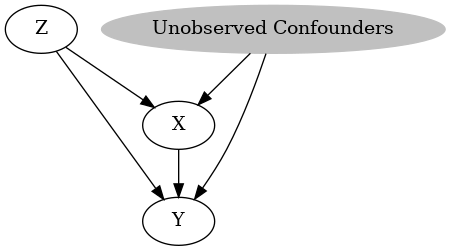

In [12]:
# With GML string
model=CausalModel(
        data = df,
        treatment='X',
        outcome='Y',
        graph="""graph[directed 1 node[id "Z" label "Z"]
                    node[id "X" label "X"]
                    node[id "Y" label "Y"]
                    edge[source "Z" target "X"]
                    edge[source "Z" target "Y"]
                    edge[source "X" target "Y"]]"""
        )
model.view_model()
display(Image(filename="causal_model.png"))

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['X'] on outcome ['Y']


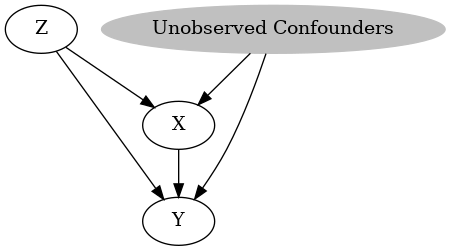

In [10]:
# With DOT string
model=CausalModel(
        data = df,
        treatment='X',
        outcome='Y',
        graph="digraph {Z -> X;Z -> Y;X -> Y;}"
        )
model.view_model()

from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [13]:
identified_estimand = model.identify_effect()
print(identified_estimand)

WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n]  y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.causal_identifier:Frontdoor variables for treatment and outcome:[]


Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor1 (Default)
Estimand expression:
 d                    
────(Expectation(Y|Z))
d[X]                  
Estimand assumption 1, Unconfoundedness: If U→{X} and U→Y then P(Y|X,Z,U) = P(Y|X,Z)

### Estimand : 2
Estimand name: iv
No such variable found!

### Estimand : 3
Estimand name: frontdoor
No such variable found!



In [14]:
causal_estimate_reg = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression",
        test_significance=True)
print(causal_estimate_reg)
print("Causal Estimate is " + str(causal_estimate_reg.value))

INFO:dowhy.causal_estimator:b: Y~X+Z
INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

## Realized estimand
b: Y~X+Z
Target units: ate

## Estimate
Mean value: 10.000000000000007
p-value: [6.09945496e-107]

Causal Estimate is 10.000000000000007


/home/emanuele/.local/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
